In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, "../func_py/")
import data_utils as ut

### Here we visualize the count histograms of the analyzed sequences

In [2]:
metadata = pd.read_csv('metadata/metadata.tsv', sep='\t', index_col=0)

In [3]:
count_fr = pd.DataFrame(index=metadata.index)
for s_name in metadata.index:
    f = pd.read_csv('sequences/'+s_name+'.tsv', sep='\t', index_col=0, low_memory=False)
    h_seqs = f[f.chain == 'H']
    count_fr.loc[s_name, 'N_heavy'] = f[f.chain == 'H'].pair_count.sum()
    count_fr.loc[s_name, 'N_light'] = f[f.chain == 'L'].pair_count.sum()
    count_fr.loc[s_name, 'N_pairs'] = f[f.paired_seq.notna()].pair_count.sum() / 2

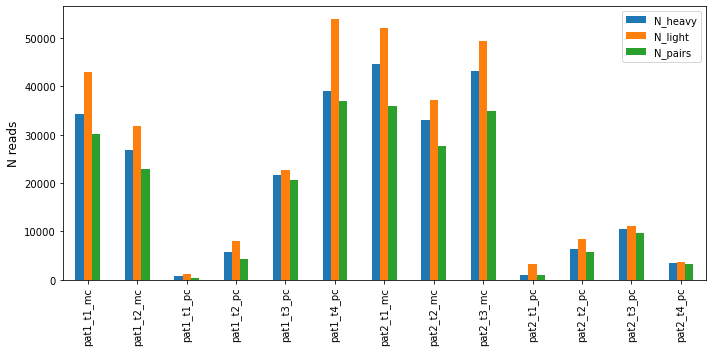

In [4]:
count_fr.plot(kind="bar",figsize=(10, 5))
plt.ylabel('N reads', fontsize=12)
plt.tight_layout()
plt.savefig('plots/N_seqs.png', dpi=200)

In [7]:
count_pairs_repl_fr = pd.DataFrame(index=metadata.index, columns=[7,5,3,1,2,4,6])
for s_name in metadata.index:
    for i in range(metadata.loc[s_name].repl_count):
        r_id = s_name + '_r' + str(i+1)
        f = pd.read_csv('sequences/replicates/'+r_id+'.tsv', sep='\t', index_col=0)
        count_pairs_repl_fr.loc[s_name, i+1] = f[f.paired_seq.notna()].pair_count.sum() / 2

In [12]:
m_indexes = metadata[metadata.cell == 'm'].index
p_indexes = metadata[metadata.cell == 'p'].index

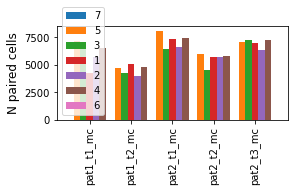

In [27]:
count_pairs_repl_fr.loc[m_indexes].plot(kind="bar",figsize=(4.2, 2.5), width=1.1)
plt.ylabel('N paired cells', fontsize=12)
plt.tight_layout()
plt.savefig('plots/N_seqs_replicates_m.svg', dpi=200)

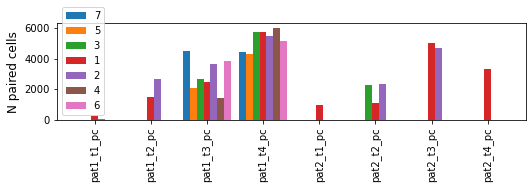

In [21]:
count_pairs_repl_fr.loc[p_indexes].plot(kind="bar",figsize=(7.5, 2.5), width=0.85)
plt.ylabel('N paired cells', fontsize=12)
plt.tight_layout()
plt.savefig('plots/N_seqs_replicates_p.svg', dpi=200)